In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
# import importlib
# importlib.reload(SIM)

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

# Recover data

Notations :
- 'Data_' : raw data, i.e. number of actions taken by each individual on each trial.
- 'Perf_xxx_time' : summary statistics across individuals for each trial.
- 'Perf_xxx_indiv' : summary statistics across trials for each individual.
- 'CV_' : convergence data (time to convergence, performance at convergence...)
- 'Non_cv_': number of non converging individuals for each replay type.
- 'det', 'sto' : deterministic and stochastic cases
- '0' :, '1', or nothing : phase of the simulation corresponding to the data, with respects to the change of reward state at trial 25 (nothing: full simulation, 0: before change, 1: after change).

In general, all files exist for the full simulation, before, and after the change in reward location.  
Exception: Only two files (0,1) exist for convergence data, as it only makes sense to compute convergence on separate phases of the simulations, on which the reward state is kept constant.

In [3]:
print(PRM.params)

{'n_individuals': 100, 'n_trials': 50, 'n_individuals_sims': {'learning': 100, 'generalization': 100, 'fast_test': 10}, 'n_trials_sims': {'learning': 50, 'generalization': 6, 'fast_test': 10}, 'alpha': 0.6, 'beta': 15.0, 'gamma': 0.9, 'alpha_vals': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'beta_vals': {'learning': 15.0, 'generalization': 10.0, 'fast_test': 15.0}, 's_start': 35, 's_rw': 22, 'starting_points': {'learning': 35, 'generalization': [21, 34, 4], 'fast_test': 35}, 'reward_states': [22, 4], 'trial_change': 25, 'RSS': 90, 'RR': 20, 'n_seq_d': 6, 'RSS_d': 15, 'epsilon_d': 0.5, 'epsilon_p': 0.001, 'perc': 0.7, 'window': 5, 'n_types_replays': 4, 'replay_types': {0: 'No replay', 1: 'Backward replay', 2: 'Random replay', 3: 'Most diverse replay', 4: 'Prioritized sweeping'}, 'replay_refs': [0, 1, 2, 3, 4], 'nA': 8, 'nS': 36, 'state_coords': [(0.00320002, 0.0059351), (0.310727, 0.0241474), (0.593997, 0.152759), (0.724483, -0.118826), (0.956215, 0.0761724), (-0.05

In [4]:
Data_det = SIM.recover_data('Data_det')
Data_sto = SIM.recover_data('Data_sto')
Data_det_g = SIM.recover_data('Data_det_g')
Data_sto_g = SIM.recover_data('Data_sto_g')
Data_det0, Data_det1, params0, params1 = ALY.split_before_after_change(Data_det) # recompute to update parameters
Data_sto0, Data_sto1, params0, params1 = ALY.split_before_after_change(Data_sto)
Data_det0

/media/esther/Data/Travail/Stages/Navigation/Codes/analyzes_MF_MB.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Trial'] -= params['trial_change'] # reset trial numbers to start from 0


Unnamed: 0  Replay type  Individual  Trial  Performance
0               0            0           0      0           83
1               1            0           0      1           51
2               2            0           0      2           62
3               3            0           0      3           93
4               4            0           0      4           37
...           ...          ...         ...    ...          ...
24970       24970            4          99     20            8
24971       24971            4          99     21            8
24972       24972            4          99     22            8
24973       24973            4          99     23            8
24974       24974            4          99     24            8

[12500 rows x 5 columns]

Split before and after change of reward location

In [5]:
Perf_det_time = SIM.recover_data('Perf_det_time')
Perf_sto_time = SIM.recover_data('Perf_sto_time')
Perf_det_time

Unnamed: 0  Replay type  Trial    Mean        STD     Q1    Q2      Q3
0             0            0      0  111.43  86.463548  45.00  83.0  153.50
1             1            0      1   81.92  68.582896  34.75  52.5  109.75
2             2            0      2   73.40  65.145376  30.00  56.0   89.75
3             3            0      3   68.53  58.228250  25.00  48.5   98.25
4             4            0      4   50.78  44.099565  23.00  37.5   65.25
..          ...          ...    ...     ...        ...    ...   ...     ...
245         245            4     45    7.31   1.927148   6.00   7.0    8.00
246         246            4     46    7.29   1.651030   6.00   7.0    8.00
247         247            4     47    7.27   1.788044   6.00   7.0    8.00
248         248            4     48    7.19   1.736059   6.00   7.0    8.00
249         249            4     49    7.23   1.731213   6.00   7.0    8.00

[250 rows x 8 columns]

In [17]:
Perf_det_indiv = SIM.recover_data('Perf_det_indiv')
Perf_det_indiv0 = SIM.recover_data('Perf_det_indiv0')
Perf_det_indiv1 = SIM.recover_data('Perf_det_indiv1')
Perf_det_indiv_g = SIM.recover_data('Perf_det_indiv_g')

Perf_sto_indiv = SIM.recover_data('Perf_sto_indiv')
Perf_sto_indiv0 = SIM.recover_data('Perf_sto_indiv0')
Perf_sto_indiv1 = SIM.recover_data('Perf_sto_indiv1')
Perf_sto_indiv_g = SIM.recover_data('Perf_sto_indiv_g')

Perf_det_indiv

Unnamed: 0  Replay type  Individual   Mean        STD
0             0            0           0  31.66  99.984921
1             1            0           1  23.40  53.352038
2             2            0           2  37.98  81.726003
3             3            0           3  25.28  50.426596
4             4            0           4  33.04  95.217007
..          ...          ...         ...    ...        ...
495         495            4          95  12.36  14.801027
496         496            4          96  19.42  43.936359
497         497            4          97  15.20  29.625665
498         498            4          98  19.00  59.286423
499         499            4          99  14.36  24.649349

[500 rows x 5 columns]

In [7]:
CV_det0 = SIM.recover_data('CV_det0')
CV_det1 = SIM.recover_data('CV_det1')
Non_cv_det0 = SIM.recover_data('Non_cv_det0', df=False)
Non_cv_det1 = SIM.recover_data('Non_cv_det1', df=False)

CV_sto0 = SIM.recover_data('CV_sto0')
CV_sto1 = SIM.recover_data('CV_sto1')
Non_cv_sto0 = SIM.recover_data('Non_cv_sto0', df=False)
Non_cv_sto1 = SIM.recover_data('Non_cv_sto1', df=False)

ALY.display_convergence(Non_cv_det0, Non_cv_det1, Non_cv_sto0, Non_cv_sto1)
CV_det0

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 2, 2: 3, 3: 0, 4: 1}
Phase 1 {0: 0, 1: 10, 2: 6, 3: 16, 4: 2}
---------------------------


Unnamed: 0  Replay type  Individual  Convergence trial  \
0             0            0           0                  6   
1             1            0           1                  5   
2             2            0           2                  5   
3             3            0           3                  5   
4             4            0           4                  5   
..          ...          ...         ...                ...   
495         495            4          95                  1   
496         496            4          96                  3   
497         497            4          97                  1   
498         498            4          98                  1   
499         499            4          99                  1   

     Performance at Convergence  Time to Convergence  
0                            19                  368  
1                            25                  375  
2                            36                  695  
3                            44                  209  
4                            19                  526  
..                          ...                  ...  
495                          36                  145  
496                          32                  188  
497                           8                  128  
498                           8                  237  
499                           8                   95  

[500 rows x 6 columns]

# Learning curves

QUESTION : For the MB agent, is the performance due mainly to model-based learning, orrather to the type of replay ?  
It might be possible to compare only MB agents performing different types of replays, as 'backward', 'random' and 'most diverse' replays are not dependent on the learning algorithm (MF or MB).  
Moreover, it might be possible to extend 'prioritized sweeping' to MF agents, by considering as predecessors the states leading to the transition in the recent history.

## Standart parameters

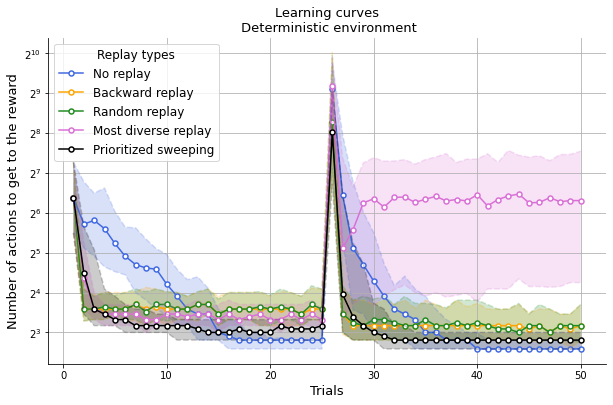

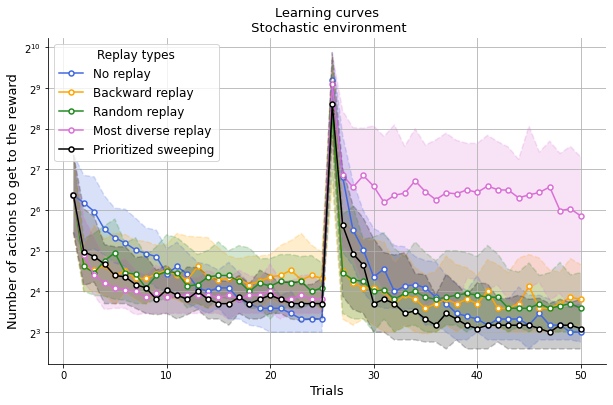

In [8]:
mode = 'median'
log_scale = True
GRAPH_p.plot_learning_curves(Perf_det_time, mode=mode, log_scale=log_scale, deterministic=True, save=False)
GRAPH_p.plot_learning_curves(Perf_sto_time, mode=mode, log_scale=log_scale, deterministic=False, save=False)

## Lower replay nomber for each sequence

Number of times each sequence is replayed : 20


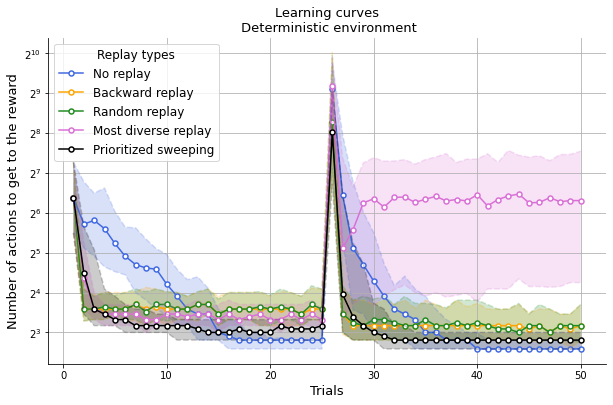

Number of times each sequence is replayed : 3


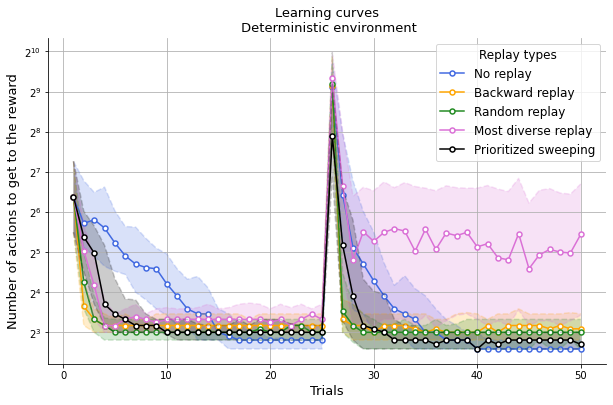

In [9]:
Perf_det_time_RRlow = SIM.recover_data('Perf_det_time_RRlow')
mode = 'median'
log_scale = True
print('Number of times each sequence is replayed : {}'.format(PRM.params['RR']))
GRAPH_p.plot_learning_curves(Perf_det_time, mode=mode, log_scale=log_scale, deterministic=True, save=False)
print('Number of times each sequence is replayed : {}'.format(3))
GRAPH_p.plot_learning_curves(Perf_det_time_RRlow, mode=mode, log_scale=log_scale, deterministic=True, save=False)

## Distributions

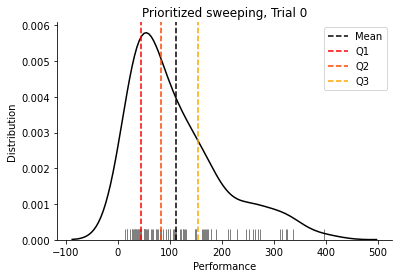

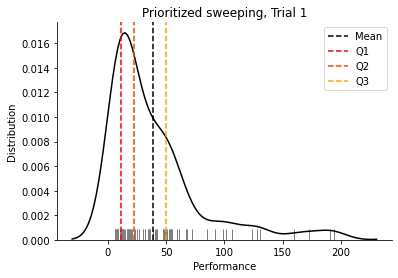

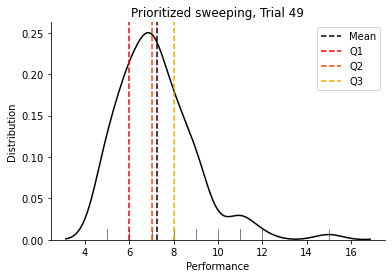

In [10]:
rep = 4
for t in [0,1,49]:
    GRAPH_p.plot_distribution_perf_trial(rep, t, Data_det, Perf_det_time)

# Performance across the population

In [11]:
Perf_det_before, Perf_det_after, t_boundary_det = ALY.split_before_after_cv(Data_det0, CV_det0)
Perf_sto_before, Perf_sto_after, t_boundary_sto = ALY.split_before_after_cv(Data_sto0, CV_sto0)

/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Deterministic environment

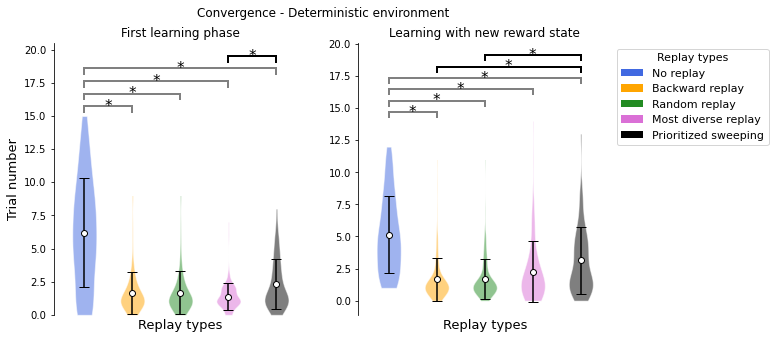

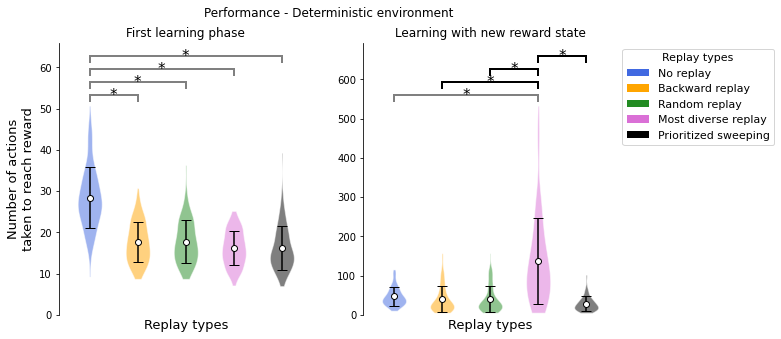

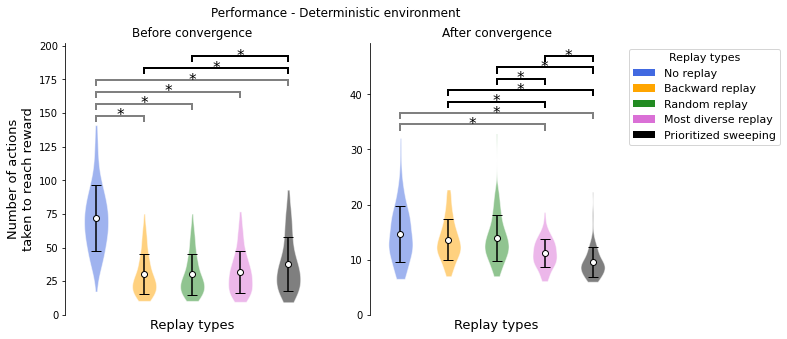

In [12]:
params = PRM.params.copy()
GRAPH_p.plot_comparison_convergence(CV_det0, CV_det1, params=params)
GRAPH_p.plot_comparison_performance(Perf_det_indiv0, Perf_det_indiv1, params=params)
GRAPH_p.plot_comparison_before_after(Perf_det_before, Perf_det_after, params=params)

## Stochastic environment

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 2, 2: 3, 3: 0, 4: 1}
Phase 1 {0: 0, 1: 10, 2: 6, 3: 16, 4: 2}
---------------------------


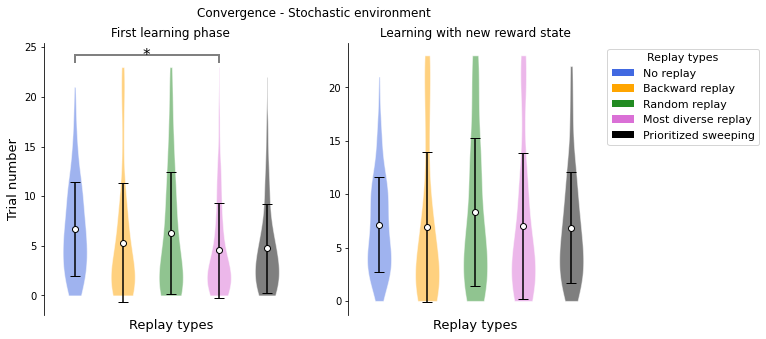

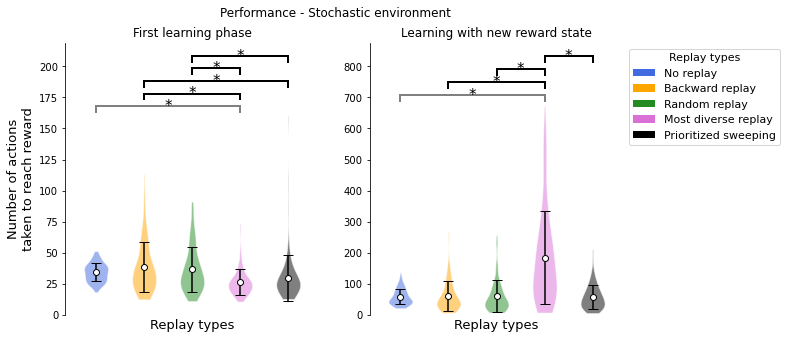

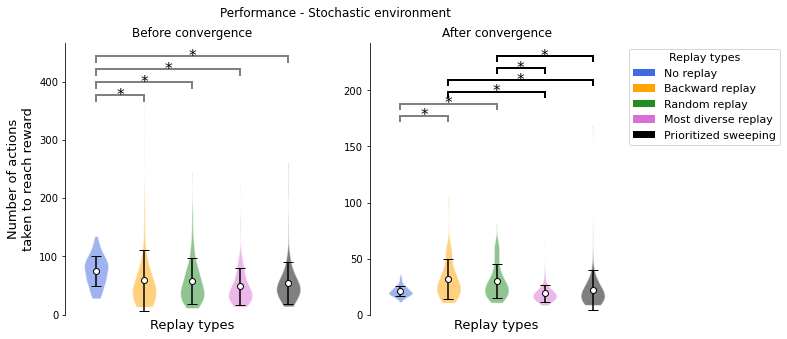

In [18]:
ALY.display_convergence(Non_cv_det0, Non_cv_det1, Non_cv_sto0, Non_cv_sto1)
GRAPH_p.plot_comparison_convergence(CV_sto0, CV_sto1, params=params, deterministic=False)
GRAPH_p.plot_comparison_performance(Perf_sto_indiv0, Perf_sto_indiv1, params=params, deterministic=False)
GRAPH_p.plot_comparison_before_after(Perf_sto_before, Perf_sto_after, params=params, deterministic=False)

## Correlations

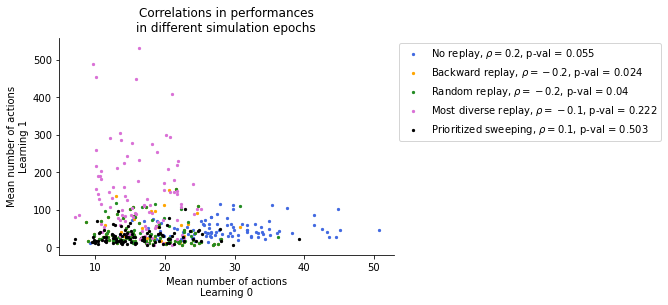

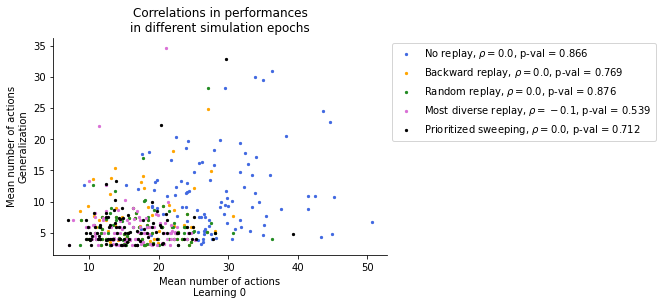

In [19]:
GRAPH_p.plot_correlations(Perf_det_indiv0, Perf_det_indiv1, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nLearning 1', params=params)
GRAPH_p.plot_correlations(Perf_det_indiv0, Perf_det_indiv_g, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nGeneralization', params=params)

# Statistical tests

## Time to convergence

In [20]:
print('>>> Deterministic environment <<<')
fvalue, pvalue = ALY.test_ANOVA(CV_det0, 'Time to Convergence')
res, pairs = ALY.test_pairwise(CV_det0, 'Time to Convergence')

>>> Deterministic environment <<<
ANOVA result : p < 0.001, F = 96.03798116613657
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  -320.52  0.001 -374.852 -266.188   True
     0      2  -320.23  0.001 -374.562 -265.898   True
     0      3  -307.65  0.001 -361.982 -253.318   True
     0      4  -263.97  0.001 -318.302 -209.638   True
     1      2     0.29    0.9  -54.042   54.622  False
     1      3    12.87    0.9  -41.462   67.202  False
     1      4    56.55 0.0367    2.218  110.882   True
     2      3    12.58    0.9  -41.752   66.912  False
     2      4    56.26 0.0382    1.928  110.592   True
     3      4    43.68 0.1808  -10.652   98.012  False
------------------------------------------------------
Significant differences between replays (> = better performance)
No replay < Backward replay, p-value : 0.001
No replay < Random replay, p-value : 0

In [21]:
print('>>> Stochastic environment <<<')
fvalue, pvalue = ALY.test_ANOVA(CV_sto0, 'Time to Convergence')
res, pairs = ALY.test_pairwise(CV_sto0, 'Time to Convergence')

>>> Stochastic environment <<<
ANOVA result : Not significant, F = nan
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     0      1  -89.9806 0.5153 -246.9724  67.0112  False
     0      2  -71.2438 0.7022 -228.6438  86.1562  False
     0      3   -210.75 0.0023 -366.9469 -54.5531   True
     0      4 -126.9753 0.1741 -283.5661  29.6156  False
     1      2   18.7368    0.9  -139.452 176.9256  False
     1      3 -120.7694  0.219 -277.7612  36.2224  False
     1      4  -36.9946    0.9 -194.3784 120.3891  False
     2      3 -139.5062   0.11 -296.9062  17.8938  False
     2      4  -55.7314 0.8563 -213.5223 102.0595  False
     3      4   83.7747 0.5745  -72.8161 240.3656  False
--------------------------------------------------------
Significant differences between replays (> = better performance)
No replay < Most diverse replay, p-value : 0.0023


## Performance

In [22]:
print('>>> Deterministic environment <<<')
fvalue, pvalue = ALY.test_ANOVA(Perf_det_indiv, 'Mean')
res, pairs = ALY.test_pairwise(Perf_det_indiv, 'Mean')

>>> Deterministic environment <<<
ANOVA result : p < 0.001, F = 63.27003254168791
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  -8.8636 0.1538 -19.5163   1.7891  False
     0      2   -8.938 0.1474 -19.5907   1.7147  False
     0      3   39.149  0.001  28.4963  49.8017   True
     0      4 -15.2334  0.001 -25.8861  -4.5807   True
     1      2  -0.0744    0.9 -10.7271  10.5783  False
     1      3  48.0126  0.001  37.3599  58.6653   True
     1      4  -6.3698 0.4752 -17.0225   4.2829  False
     2      3   48.087  0.001  37.4343  58.7397   True
     2      4  -6.2954 0.4869 -16.9481   4.3573  False
     3      4 -54.3824  0.001 -65.0351 -43.7297   True
------------------------------------------------------
Significant differences between replays (> = better performance)
No replay > Most diverse replay, p-value : 0.001
No replay < Prioritized sweeping, 

In [23]:
print('>>> Stochastic environment <<<')
fvalue, pvalue = ALY.test_ANOVA(Perf_sto_indiv, 'Mean')
res, pairs = ALY.test_pairwise(Perf_sto_indiv, 'Mean')

>>> Stochastic environment <<<
ANOVA result : p < 0.001, F = 45.69699266709391
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   3.1142    0.9 -11.8189  18.0473  False
     0      2   1.9462    0.9 -12.9869  16.8793  False
     0      3  58.6786  0.001  43.7455  73.6117   True
     0      4  -2.7022    0.9 -17.6353  12.2309  False
     1      2   -1.168    0.9 -16.1011  13.7651  False
     1      3  55.5644  0.001  40.6313  70.4975   True
     1      4  -5.8164 0.8001 -20.7495   9.1167  False
     2      3  56.7324  0.001  41.7993  71.6655   True
     2      4  -4.6484    0.9 -19.5815  10.2847  False
     3      4 -61.3808  0.001 -76.3139 -46.4477   True
------------------------------------------------------
Significant differences between replays (> = better performance)
No replay > Most diverse replay, p-value : 0.001
Backward replay > Most diverse replay

# Optimization of the learning rate

WARNING : According to the formula, a model-based learning does not depend on $\alpha$.  
$Q(s,a) = R(s,a) + \gamma \sum\limits_{s'}T(s,a,s')\max_{u\in A}Q(s',u)$.  
This is also the case in Mehdi's code.  

In [24]:
params = PRM.params.copy()
Data_det_a_all = SIM.recover_data('Data_det_a_all')
Data_sto_a_all = SIM.recover_data('Data_sto_a_all')
Data_det_a_all

Unnamed: 0  Replay type  alpha      Mean         STD       Q1      Q2  \
0            0            0    0.0  121.4524   14.111311  111.305  122.55   
1            1            0    0.1   81.3738   13.524854   72.600   81.54   
2            2            0    0.2   62.9246   16.205504   51.790   62.40   
3            3            0    0.3   54.8808   18.699882   40.575   51.23   
4            4            0    0.4   45.2118   14.319199   35.140   42.74   
5            5            0    0.5   39.7698   13.543082   30.165   36.92   
6            6            0    0.6   37.7174   12.866745   29.160   36.22   
7            7            0    0.7   35.5510   14.196534   25.115   32.01   
8            8            0    0.8   35.2956   13.376539   26.495   31.78   
9            9            0    0.9   33.9510   11.569900   24.935   31.50   
10          10            0    1.0   34.0844   14.033111   23.280   29.99   
11          11            1    0.0  121.4524   14.111311  111.305  122.55   
12          12            1    0.1   41.4884   22.869448   24.515   37.38   
13          13            1    0.2   34.7948   19.166078   20.480   29.76   
14          14            1    0.3   35.4114   22.089274   18.575   27.98   
15          15            1    0.4   32.4216   22.854345   18.095   23.55   
16          16            1    0.5   31.1768   17.275312   18.055   23.88   
17          17            1    0.6   28.8538   16.867557   17.470   21.40   
18          18            1    0.7   29.6560   20.238364   16.465   20.28   
19          19            1    0.8   25.8248   13.418438   16.800   20.58   
20          20            1    0.9   28.6818   16.916172   17.515   21.02   
21          21            1    1.0   27.1384   15.676824   16.100   20.18   
22          22            2    0.0  121.4524   14.111311  111.305  122.55   
23          23            2    0.1   39.0114   20.636688   22.325   34.35   
24          24            2    0.2   32.1702   17.265378   18.970   27.68   
25          25            2    0.3   32.5282   18.600198   18.215   27.25   
26          26            2    0.4   33.2624   18.838441   18.495   27.48   
27          27            2    0.5   33.1640   19.800203   17.870   25.36   
28          28            2    0.6   28.7794   16.290666   17.750   21.40   
29          29            2    0.7   29.5422   20.392229   16.465   20.11   
30          30            2    0.8   25.8248   13.418438   16.800   20.58   
31          31            2    0.9   28.6818   16.916172   17.515   21.02   
32          32            2    1.0   27.1384   15.676824   16.100   20.18   
33          33            3    0.0  121.4524   14.111311  111.305  122.55   
34          34            3    0.1  189.9202  124.063304   90.735  176.69   
35          35            3    0.2  140.2996   98.463217   60.505  128.64   
36          36            3    0.3   99.2978   70.352096   40.240   76.73   
37          37            3    0.4   92.8748   81.195060   37.755   69.28   
38          38            3    0.5   83.7530   59.569217   33.740   72.62   
39          39            3    0.6   76.8664   54.178514   37.155   63.85   
40          40            3    0.7   79.6590   62.278148   32.650   62.62   
41          41            3    0.8   72.0516   46.991558   31.270   66.40   
42          42            3    0.9   63.8658   43.635337   29.485   50.26   
43          43            3    1.0   56.1154   43.048967   25.100   43.33   
44          44            4    0.0   22.4840    9.803555   15.180   20.81   
45          45            4    0.1   22.4840    9.803555   15.180   20.81   
46          46            4    0.2   22.4840    9.803555   15.180   20.81   
47          47            4    0.3   22.4840    9.803555   15.180   20.81   
48          48            4    0.4   22.4840    9.803555   15.180   20.81   
49          49            4    0.5   22.4840    9.803555   15.180   20.81   
50          50            4    0.6   22.4840    9.803555   15.180   20.81   


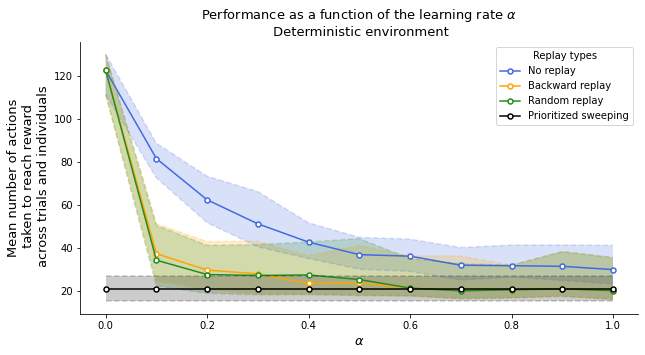

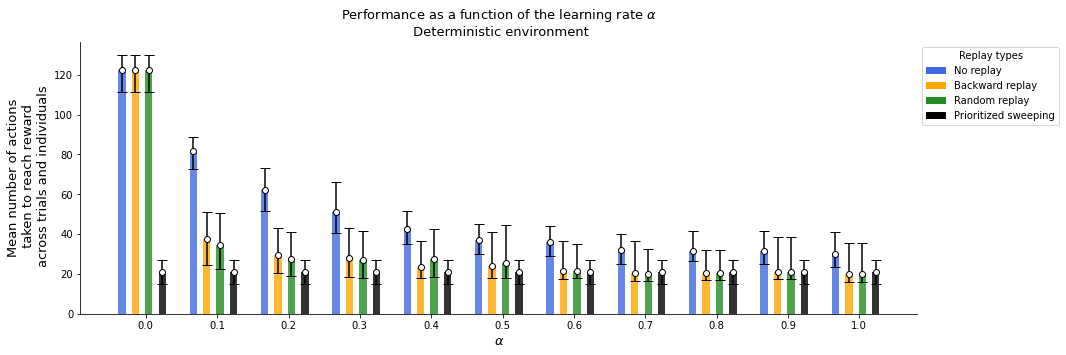

In [30]:
params = PRM.set_replays(params, replay_refs=[0,1,2,4])
# params = PRM.set_replays(params, replay_refs=[0,1,2,3,4])
GRAPH_p.compare_alpha_values_replays(Data_det_a_all, deterministic=True, curve=True, params=params)
GRAPH_p.compare_alpha_values_replays(Data_det_a_all, deterministic=True, curve=False, params=params)

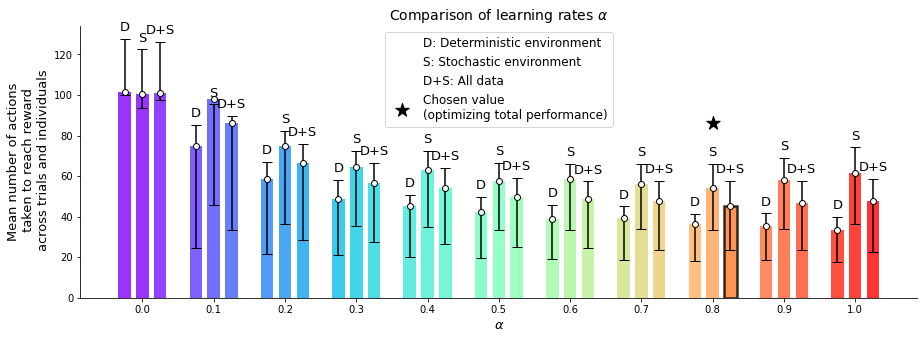

In [26]:
Data_a_summary = SIM.recover_data('Data_a_summary')
GRAPH_p.compare_alpha_det_stoch_all(Data_a_summary, params)

# Individuals - Trajectories and Replays

It might be useful to test other rearded locations, as the only one tested tends to be on the same side as the one most explored by the agents.  
In the most diverse sequence, it might be advantageous to also incorporate several trajectories from the first trial, instea of only the last steps of the desired length.

In [27]:
Data_det_RRlow = SIM.recover_data('Data_det_RRlow')
Data_det_RRlow_g = SIM.recover_data('Data_det_RRlow_g')
Perf_det_time_RRlow = SIM.recover_data('Perf_det_time_RRlow')
# Perf_det_time_RRlow
i_repr = ALY.identify_representative(Data_det_RRlow, Perf_det_time_RRlow, params=params)

In [28]:
params = PRM.params.copy()
params['RR'] = 3
PRM.set_environment(params=params, deterministic=True)

Data_trials, Performance, Models = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params)
Perf0 = [Performance[rep][:params['trial_change']] for rep in params['replay_refs']]
Perf1 = [Performance[rep][params['trial_change']:] for rep in params['replay_refs']]

Data_trials_gen, Perfg, _ = SIM.get_individual_data_per_trial(i_indiv=i_repr, params=params, Models0=Models)

Data0, Data1, params0, params1 = ALY.split_before_after_change(Data_det_RRlow, params=params)
Perf_pop0 = ALY.compute_performance_in_time(Data0, params0)
Perf_pop1 = ALY.compute_performance_in_time(Data1, params1)

paramsg = params.copy()
paramsg = PRM.set_simulation(paramsg, sim='generalization')
Perf_popg = ALY.compute_performance_in_time(Data_det_RRlow_g, paramsg)

Transition matrix set to deterministic in params.


/media/esther/Data/Travail/Stages/Navigation/Codes/analyzes_MF_MB.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Trial'] -= params['trial_change'] # reset trial numbers to start from 0
/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


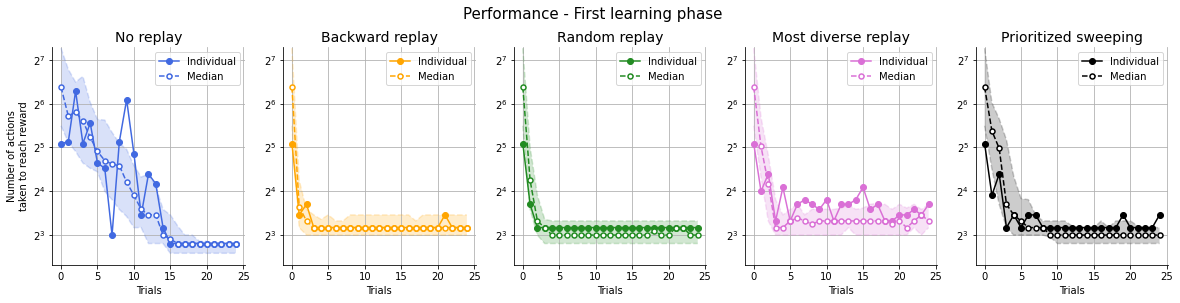

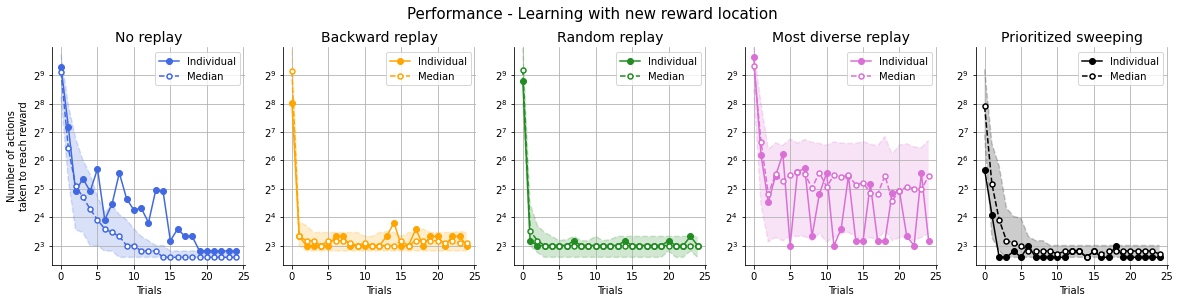

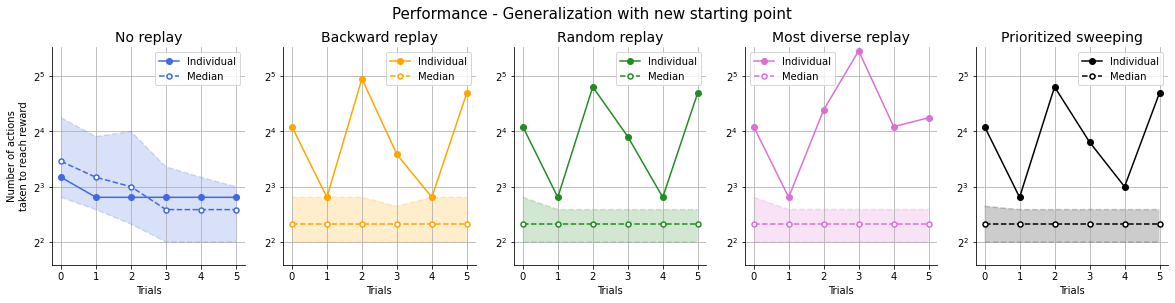

In [29]:
GRAPH_i.plot_performance_replays(Perf0, Perf1, Perfg, Perf_pop0, Perf_pop1, Perf_popg)

## Learning - Phase 0

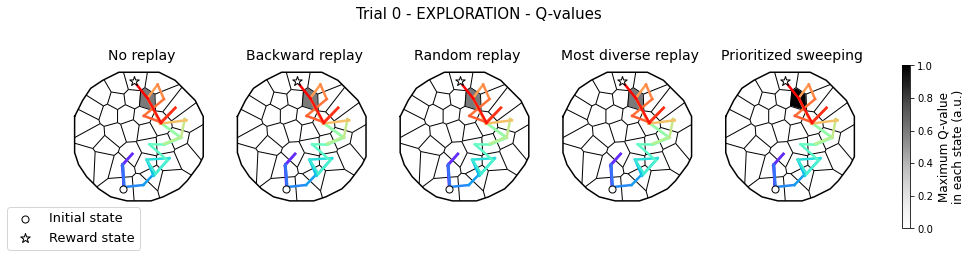

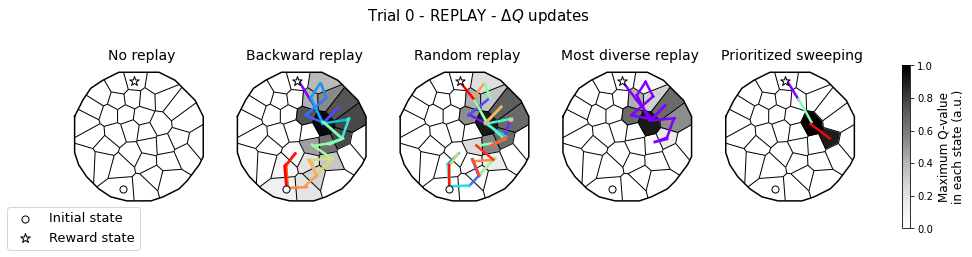

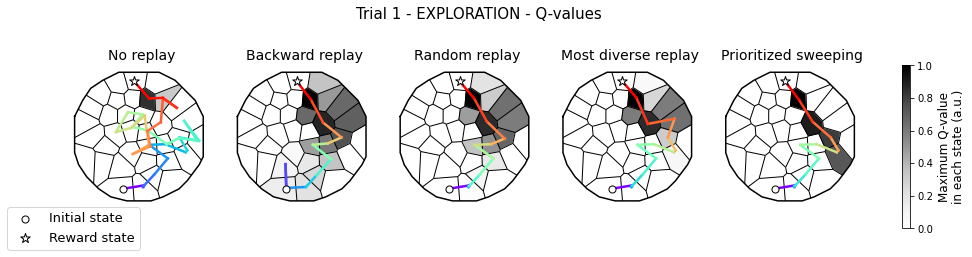

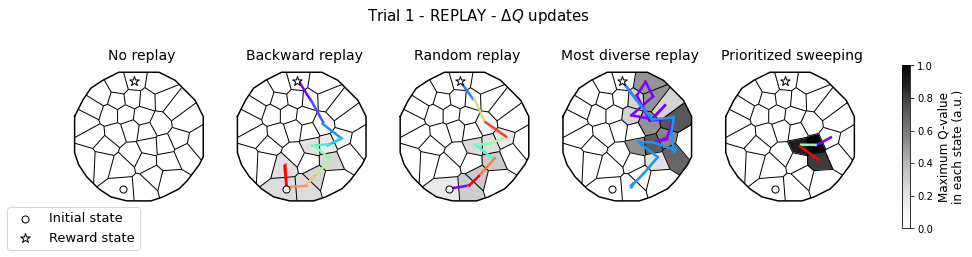

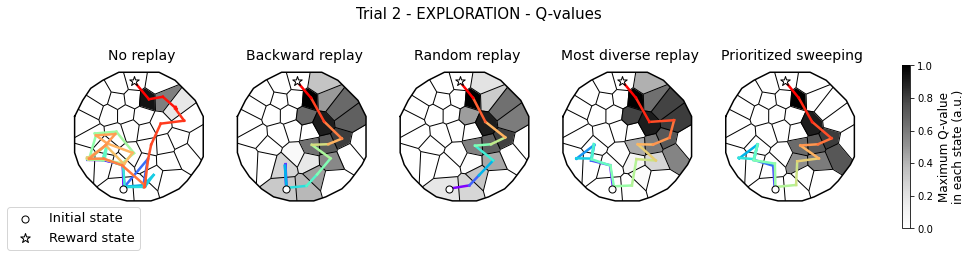

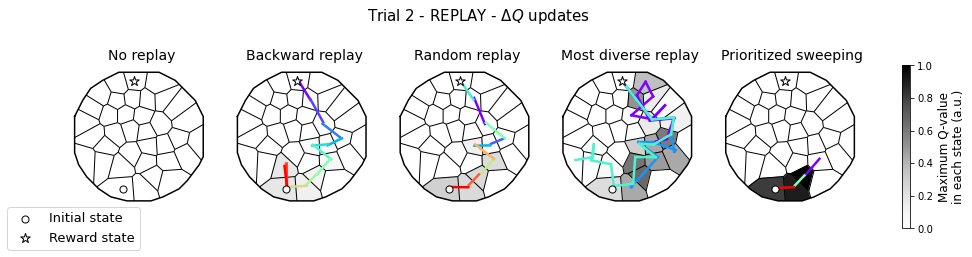

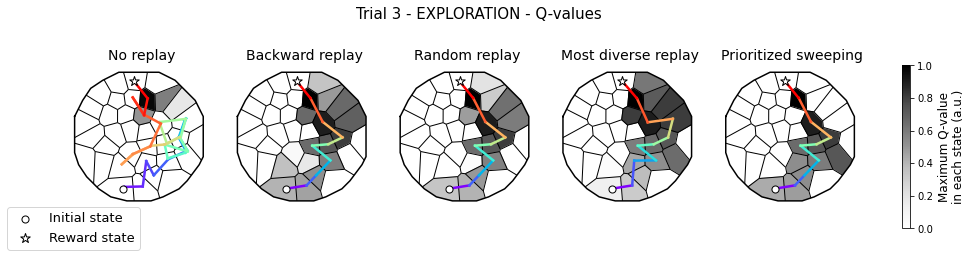

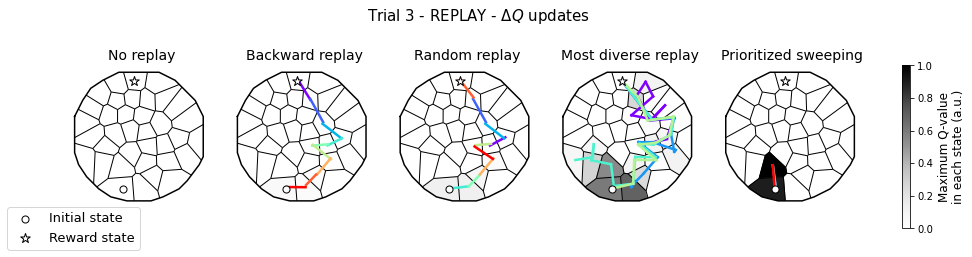

In [34]:
n_trials = 4
for t in range(n_trials):
    Q_rpls = Data_trials[t]['Q_explo']
    H_rpls = Data_trials[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, save=False, fig_title='Trial {} - EXPLORATION - Q-values'.format(t), params=params)
    Q_rpls = Data_trials[t]['Q_upd']
    H_rpls = Data_trials[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, save=False, fig_title=r'Trial {} - REPLAY - $\Delta Q$ updates'.format(t), params=params)

## Learning - Phase 1 (after change of reward state)

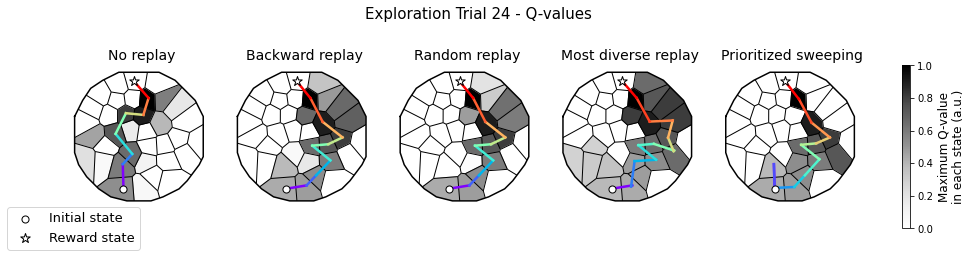

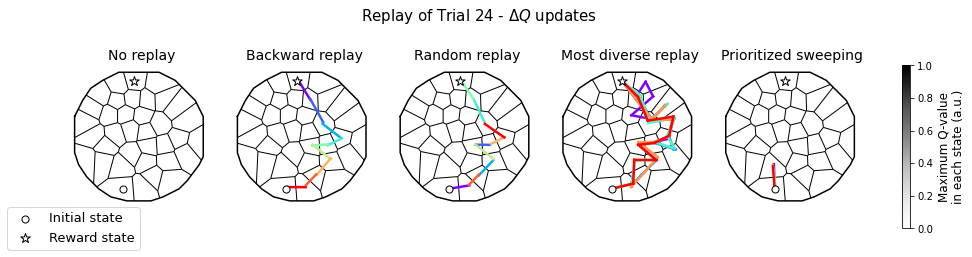

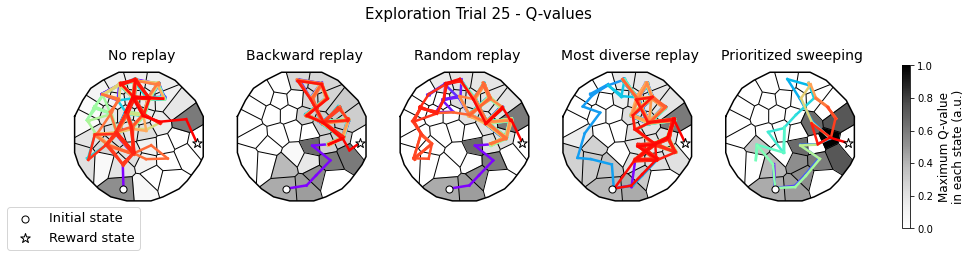

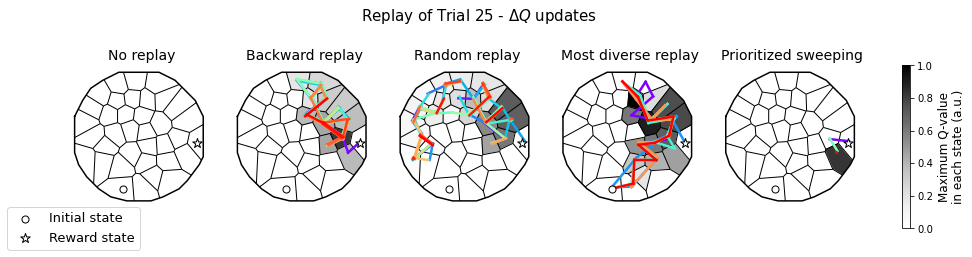

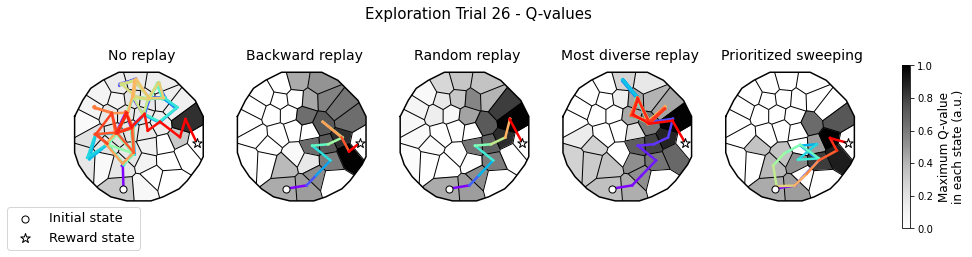

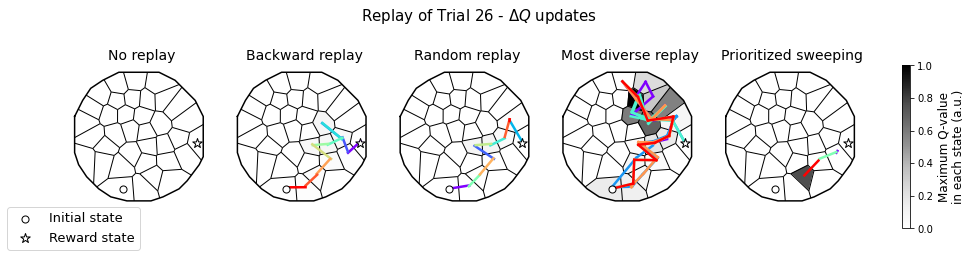

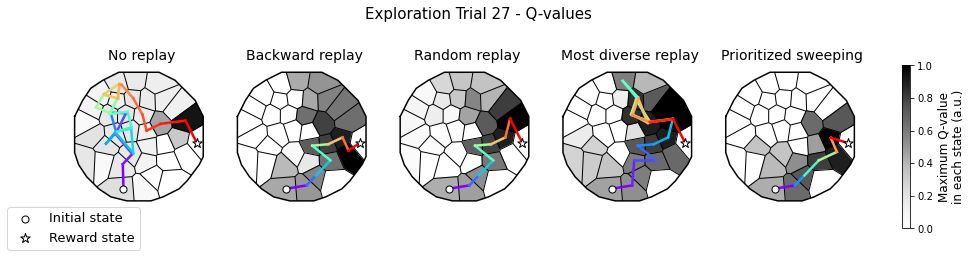

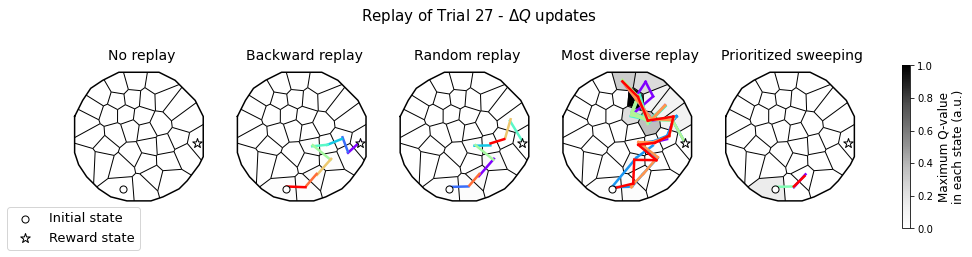

In [35]:
n_trials = 4
for t in range(24, 24+n_trials):
    if t == 24:
        r_state = 0
    else:
        r_state = 1
    Q_rpls = Data_trials[t]['Q_explo']
    H_rpls = Data_trials[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, save=False, fig_title='Exploration Trial {} - Q-values'.format(t), params=params)
    Q_rpls = Data_trials[t]['Q_upd']
    H_rpls = Data_trials[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, save=False, fig_title=r'Replay of Trial {} - $\Delta Q$ updates'.format(t), params=params)

## Generalization

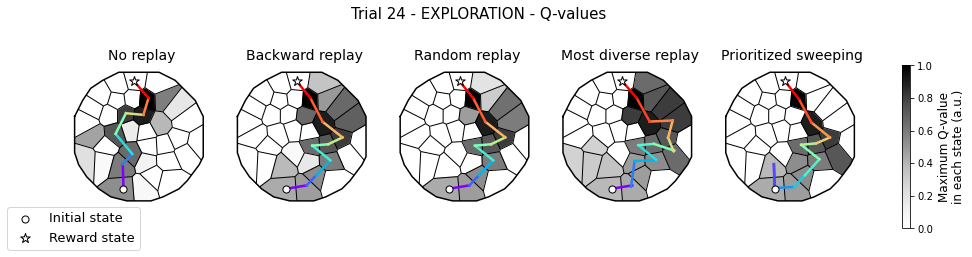

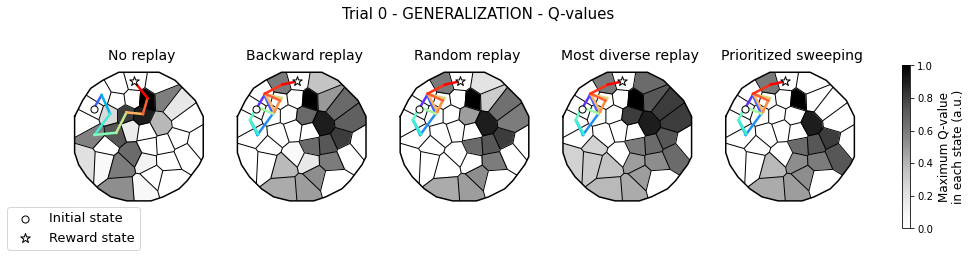

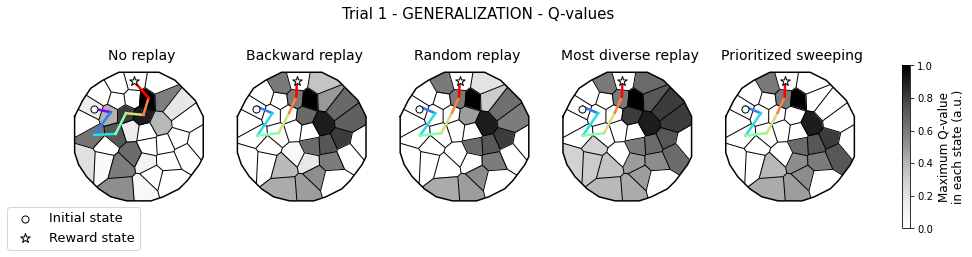

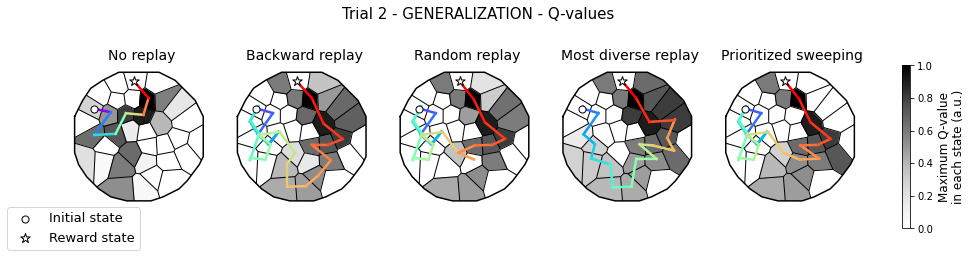

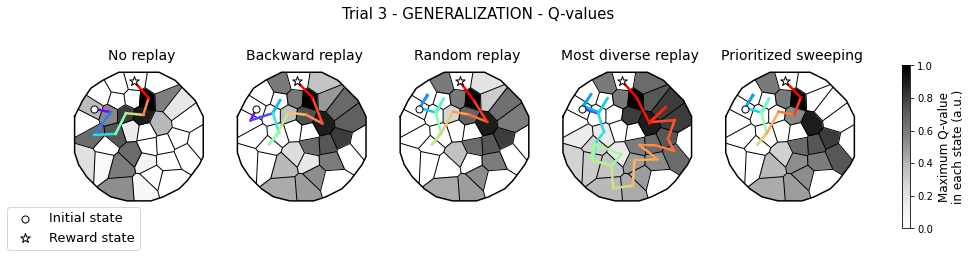

In [36]:
t = 24 
Q_rpls = Data_trials[t]['Q_explo']
H_rpls = Data_trials[t]['h_explo']
GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, save=False, fig_title='Trial {} - EXPLORATION - Q-values'.format(t), params=params)

n_trials = 4
for t in range(n_trials):
    Q_rpls = Data_trials_gen[t]['Q_explo']
    H_rpls = Data_trials_gen[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, epoch='generalization', deterministic=True, save=False, fig_title='Trial {} - GENERALIZATION - Q-values'.format(t), params=params)

## Q-value map - Individual 50 on trial 3

In [4]:
Model_det = SIM.recover_data('Model_det', df=False)
Q_50_3_det = Model_det['Q_50_3']
Model_sto = SIM.recover_data('Model_sto', df=False)
Q_50_3_sto = Model_sto['Q_50_3']

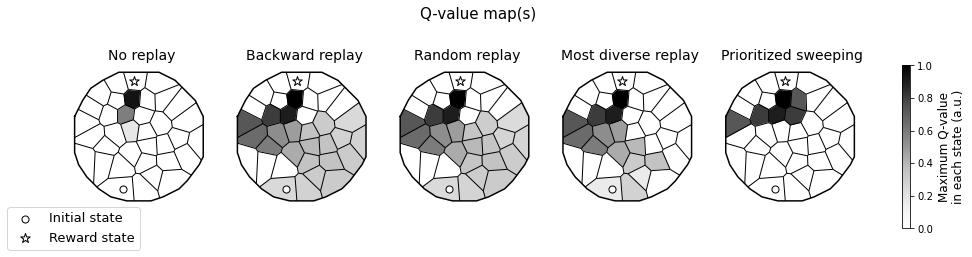

In [6]:
GRAPH_Qmap.plot_Qvalues_map(Q_50_3_det, deterministic=True, save=False)